In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [10]:
data=pd.read_csv('C:/Users/cmgou/Documents/Meta scifor/Test 8.0/Test 8.0/Classification Problem/Personality_Dataset.csv')

In [11]:
data.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [12]:
data.shape

(2900, 9)

In [13]:
data.describe()

,Unnamed: 0,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000,2900.000000
mean,1449.500000,4.505816,3.963354,3.000000,6.268863,3.564727,0.514138
std,837.302215,3.479192,2.903827,2.247327,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,724.750000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,1449.500000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,2174.250000,8.000000,6.000000,5.000000,10.000000,6.000000,1.000000
max,2899.000000,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


In [14]:
data.isnull().sum()

Unnamed: 0                    0
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [17]:
# Apply fillna(0) only to all columns except 'Personality'
data.loc[:, data.columns != 'Personality'] = data.loc[:, data.columns != 'Personality'].fillna(0)



In [18]:
data.isnull().sum()

Unnamed: 0                   0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [20]:
data.drop(columns=['Unnamed: 0'], inplace=True)


In [21]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [22]:
data.duplicated().sum()

439

In [23]:
data.drop_duplicates(inplace=True)


In [24]:
data.duplicated().sum()

0

In [25]:
data.shape

(2461, 8)

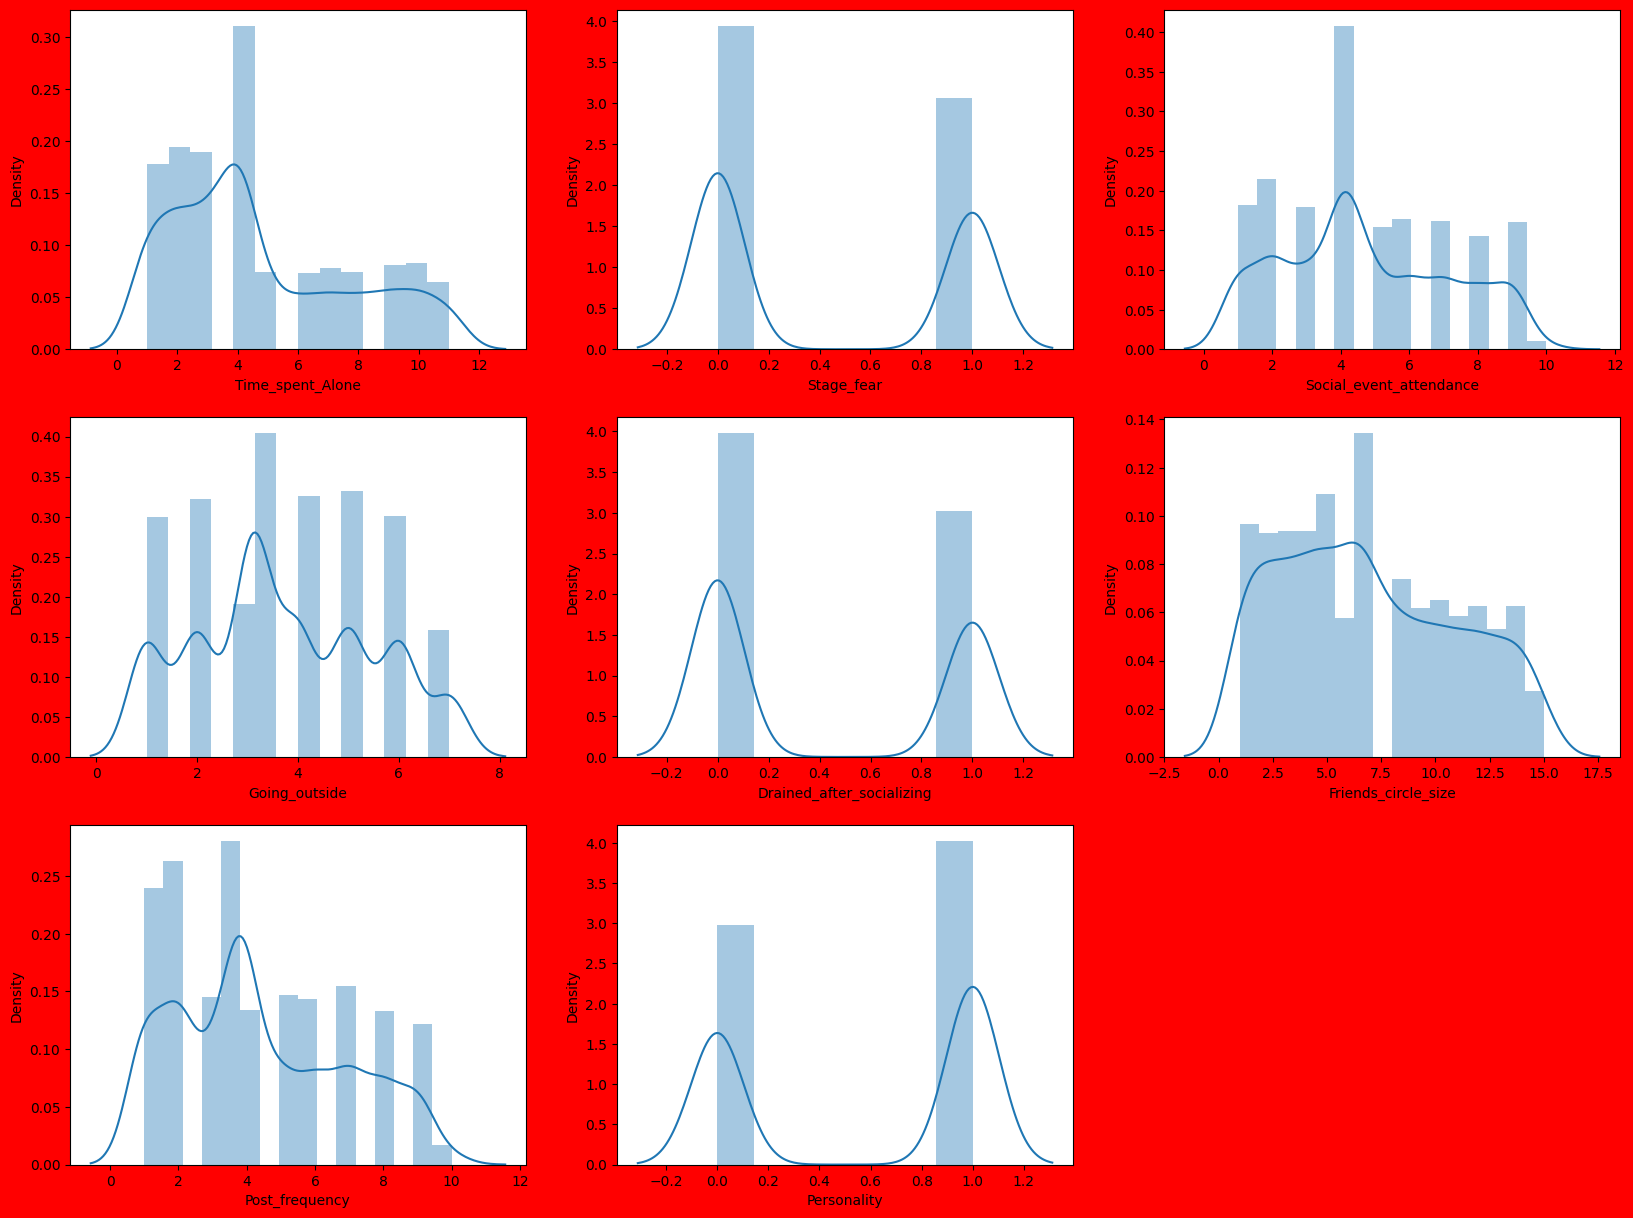

In [28]:
plt.figure(figsize=(20,15),facecolor='red')
graph=1
for column in data:
    if graph <=9:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.show()

In [26]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].replace(0, data['Time_spent_Alone'].mean())
data['Social_event_attendance'] = data['Social_event_attendance'].replace(0, data['Social_event_attendance'].mean())
data['Going_outside'] = data['Going_outside'].replace(0, data['Going_outside'].mean())
data['Friends_circle_size'] = data['Friends_circle_size'].replace(0, data['Friends_circle_size'].mean())
data['Post_frequency'] = data['Post_frequency'].replace(0, data['Post_frequency'].mean())
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

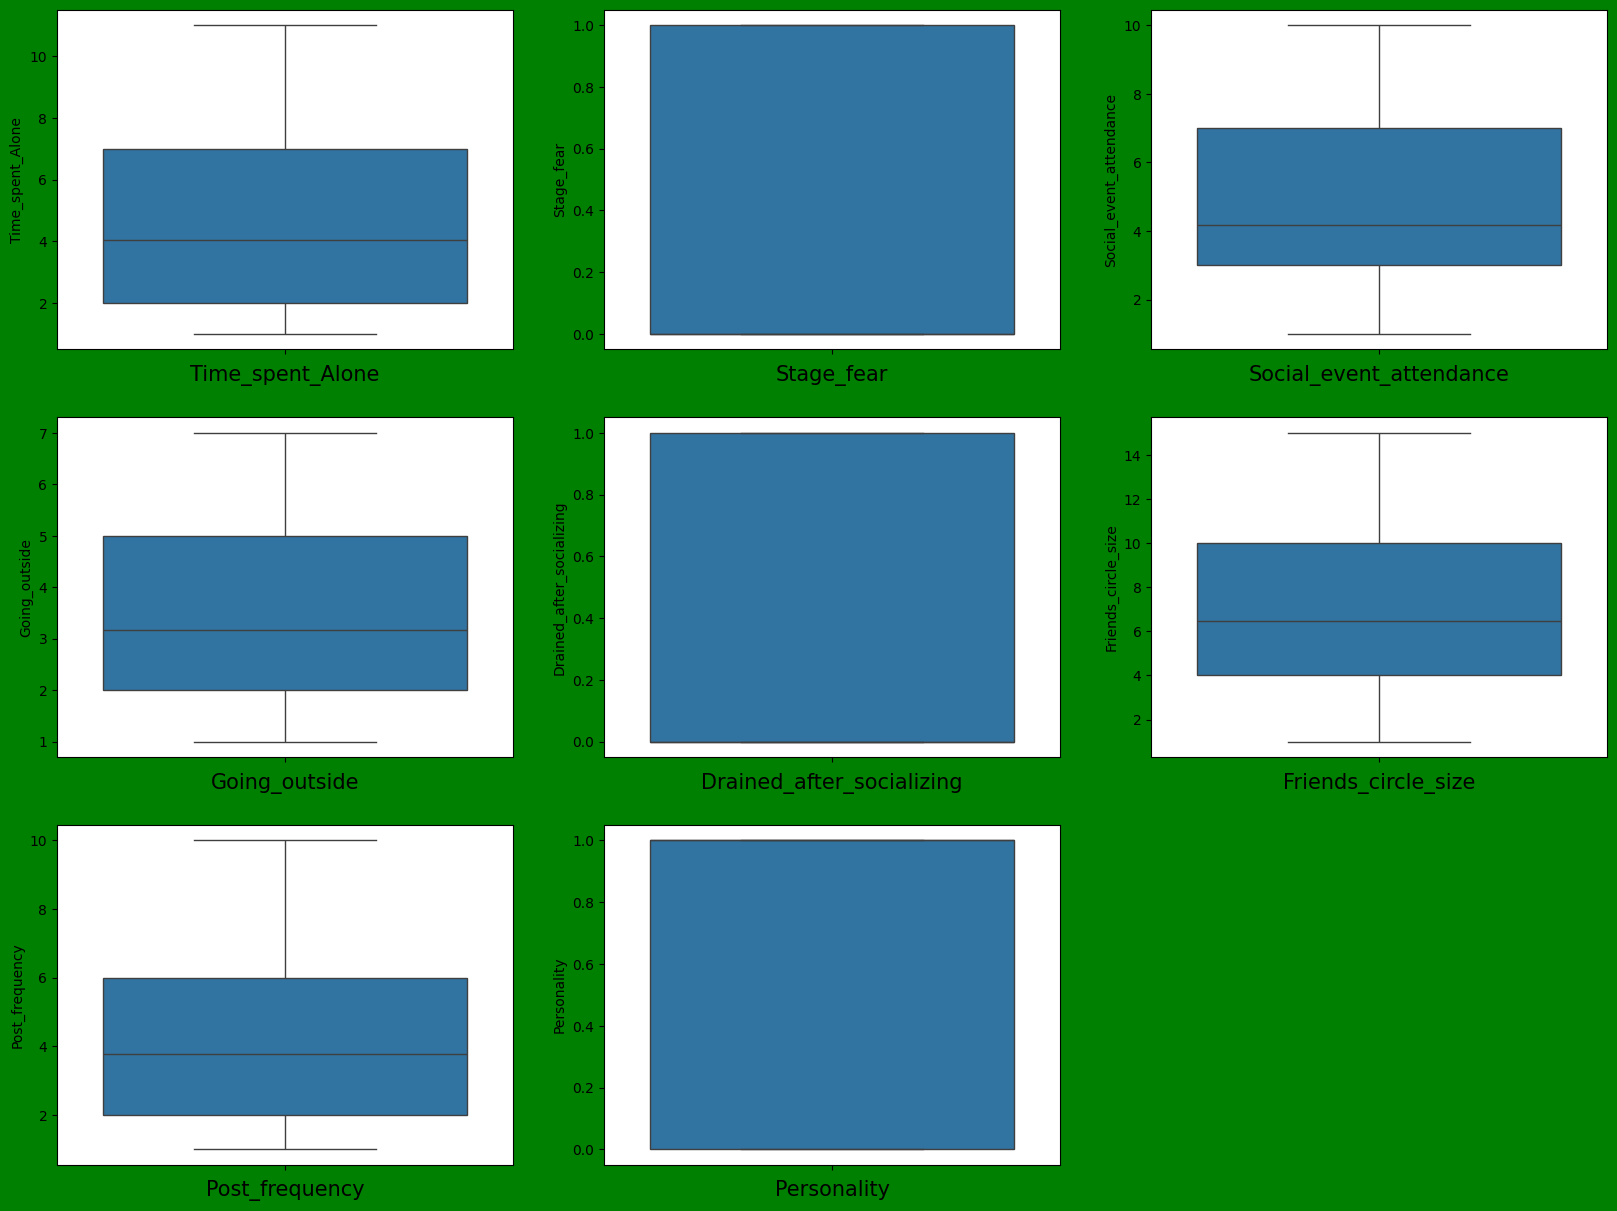

In [27]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

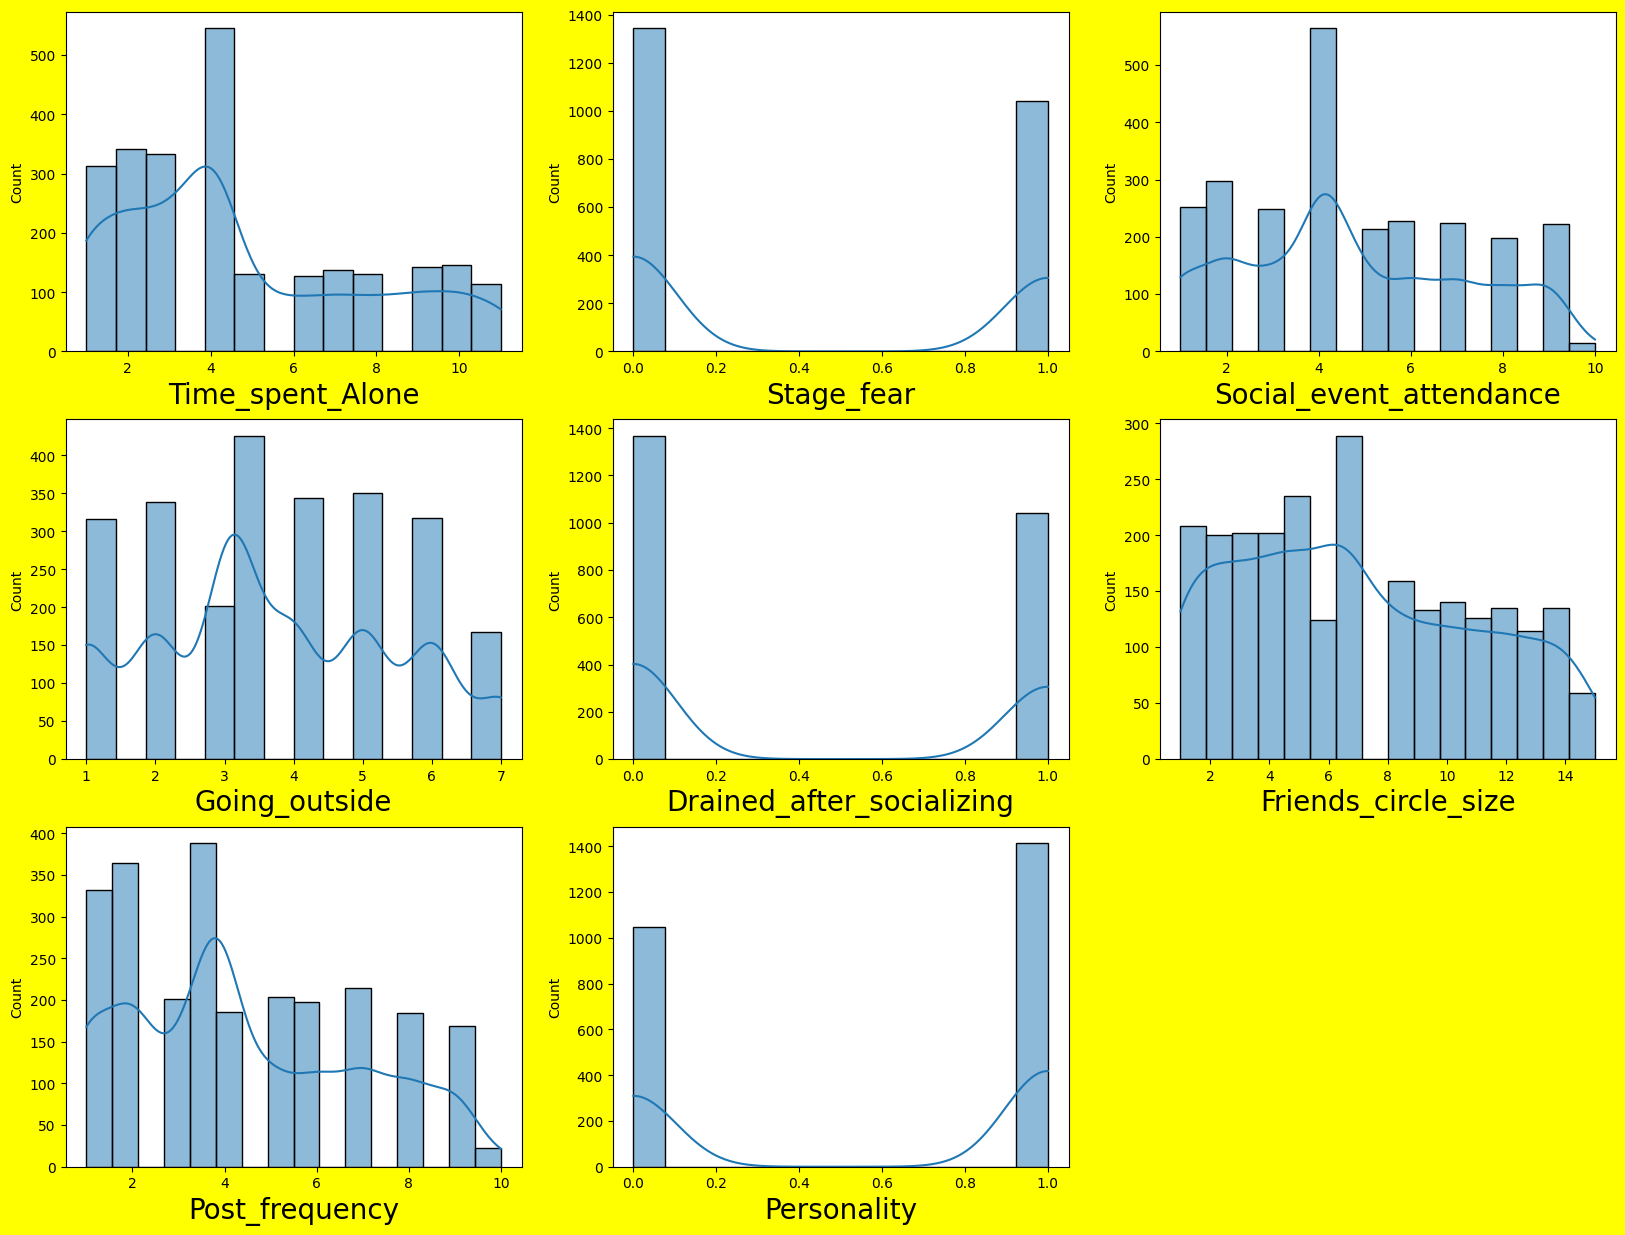

In [30]:

numeric_columns = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15), facecolor='yellow')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

In [31]:
data['Personality'] = data['Personality'].replace({'Extrovert': 1, 'Introvert': 0})

In [33]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.0,1
1,9.000000,1.0,4.178789,3.168224,1.0,6.488826,3.0,0
2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.0,0
3,4.048761,0.0,6.000000,7.000000,0.0,14.000000,8.0,1
4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.0,1


In [34]:
# 4. Define Features and Target

# Define Target variable
Y = data['Personality']  # Target: 0 for Introvert, 1 for Extrovert

# Define feature variables
X = data[[
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]]


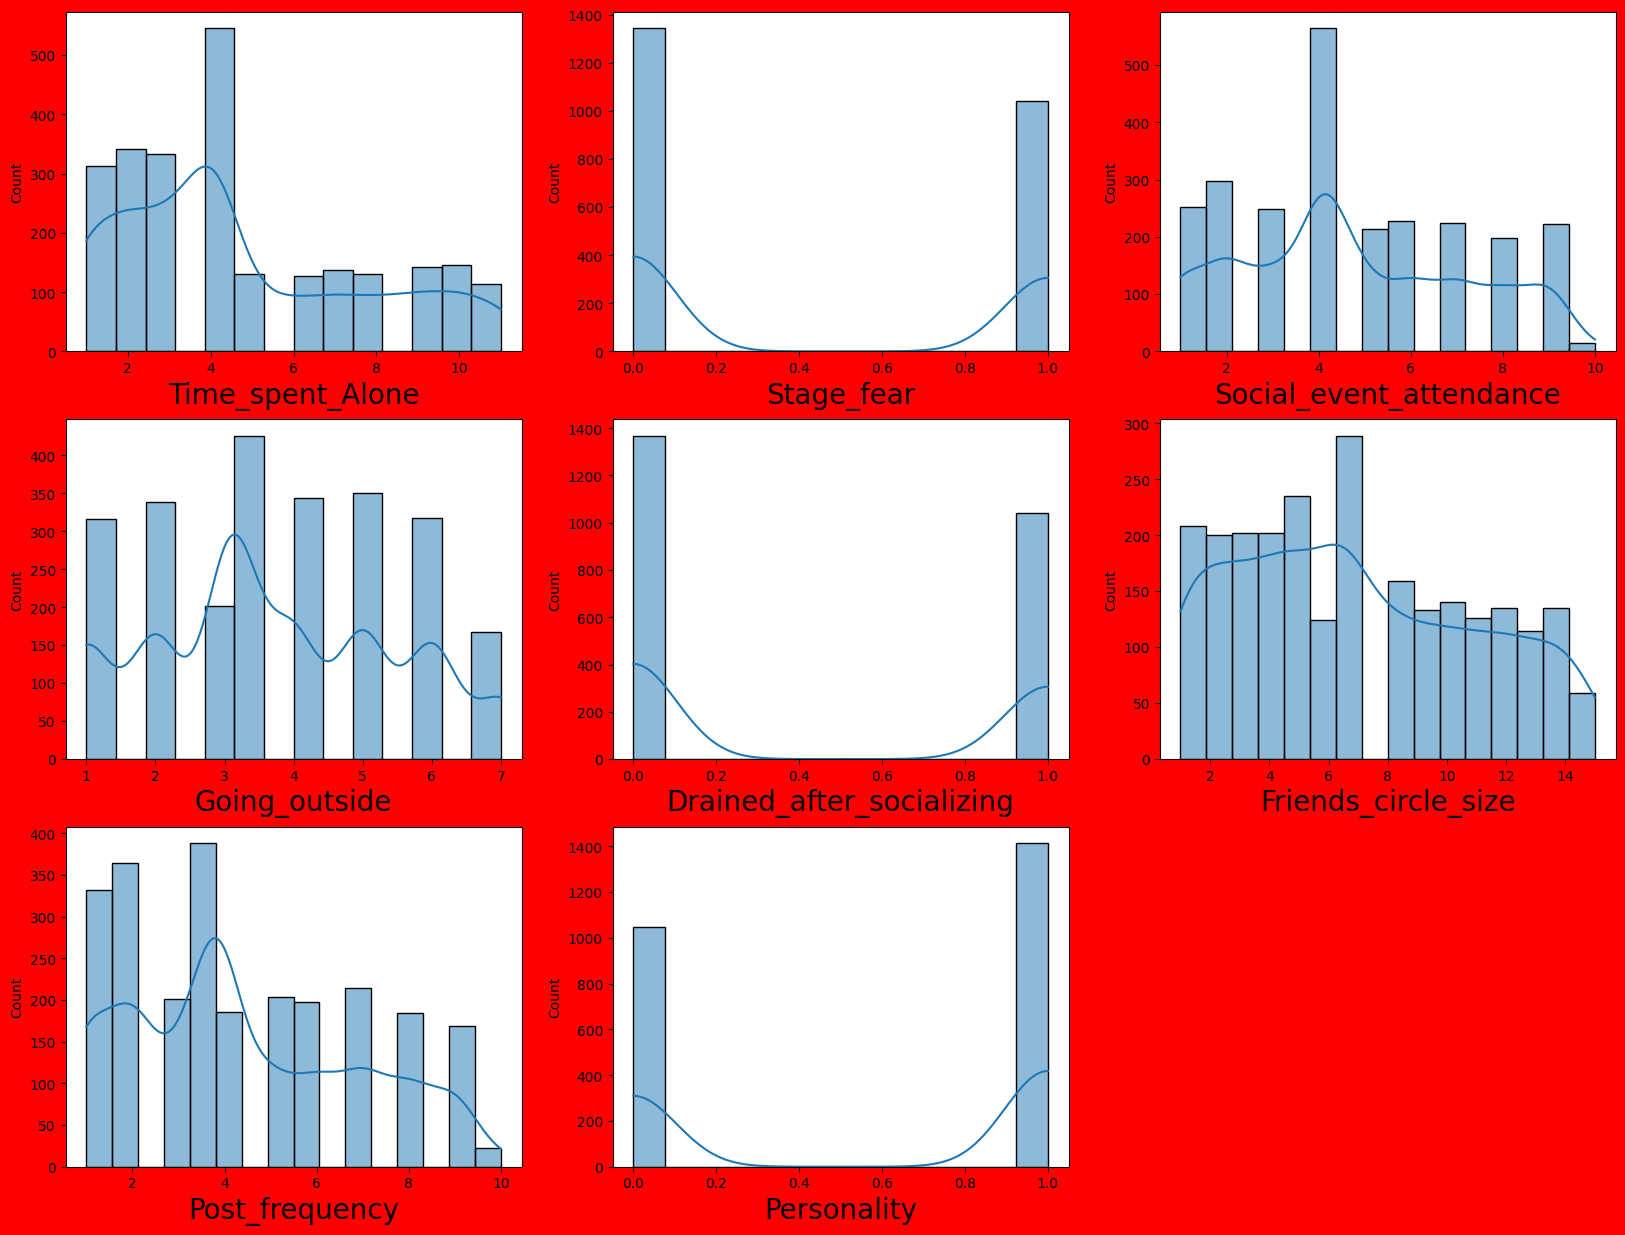

In [35]:
### 5. Exploratory Data Analysis (EDA)
# Distribution Plots:**
# Use `sns.histplot()` or `sns.kdeplot()` to check how each feature is distributed.
# Helps understand skewness and variability.


plt.figure(figsize=(20, 15), facecolor='red')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

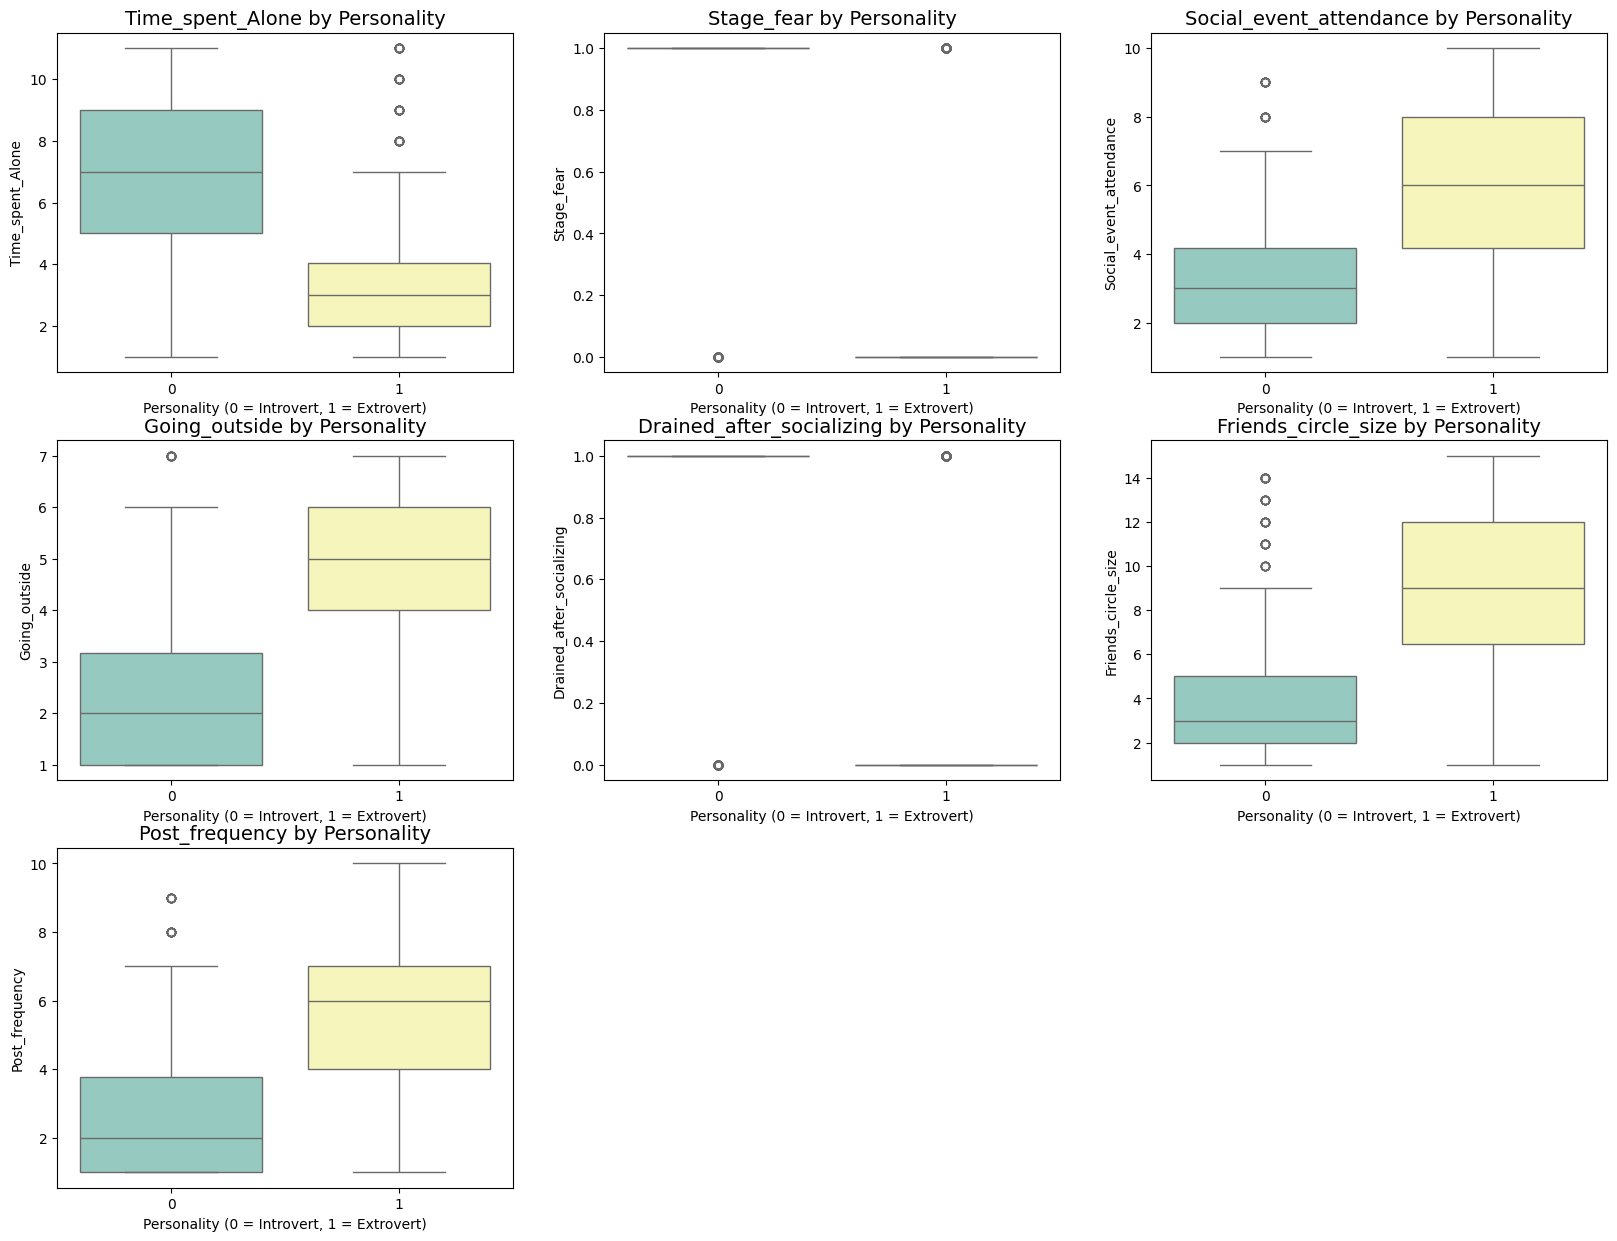

In [37]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(x='Personality', y=column, data=data, palette='Set3')
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()

In [45]:
#1st quantile 
q1=data.quantile(0.25)

In [46]:
#3rd quantile
q3=data.quantile(0.75)

In [47]:
print(q1)
print(q3)
print(IQR)

Time_spent_Alone             2.0
Stage_fear                   0.0
Social_event_attendance      3.0
Going_outside                2.0
Drained_after_socializing    0.0
Friends_circle_size          4.0
Post_frequency               2.0
Personality                  0.0
Name: 0.25, dtype: float64
Time_spent_Alone              7.0
Stage_fear                    1.0
Social_event_attendance       7.0
Going_outside                 5.0
Drained_after_socializing     1.0
Friends_circle_size          10.0
Post_frequency                6.0
Personality                   1.0
Name: 0.75, dtype: float64
4.0


In [49]:
q1 = data['Time_spent_Alone'].quantile(0.25)
q3 = data['Time_spent_Alone'].quantile(0.75)
IQR = q3 - q1

Time_spent_Alone_high = q3 + (1.5 * IQR)
Time_spent_Alone_low = q1 - (1.5 * IQR)

print("Upper Bound:", Time_spent_Alone_high)
print("Lower Bound:", Time_spent_Alone_low)


Upper Bound: 14.5
Lower Bound: -5.5


In [51]:
index = np.where(data['Time_spent_Alone'] > Time_spent_Alone_high)

index

(array([], dtype=int64),)

In [52]:
q1 = data['Social_event_attendance'].quantile(0.25)
q3 = data['Social_event_attendance'].quantile(0.75)
IQR = q3 - q1

Social_event_attendance_high = q3 + (1.5 * IQR)
Social_event_attendance_low = q1 - (1.5 * IQR)

print("Upper Bound:", Social_event_attendance_high)
print("Lower Bound:", Social_event_attendance_low)


Upper Bound: 13.0
Lower Bound: -3.0


In [53]:
index = np.where(data['Social_event_attendance'] > Social_event_attendance_high)

index

(array([], dtype=int64),)

In [54]:
q1 = data['Going_outside'].quantile(0.25)
q3 = data['Going_outside'].quantile(0.75)
IQR = q3 - q1

Going_outside_high = q3 + (1.5 * IQR)
Going_outside_low = q1 - (1.5 * IQR)

print("Upper Bound:", Going_outside_high)
print("Lower Bound:", Going_outside_low)


Upper Bound: 9.5
Lower Bound: -2.5


In [55]:
index = np.where(data['Going_outside'] > Going_outside_high)

index

(array([], dtype=int64),)

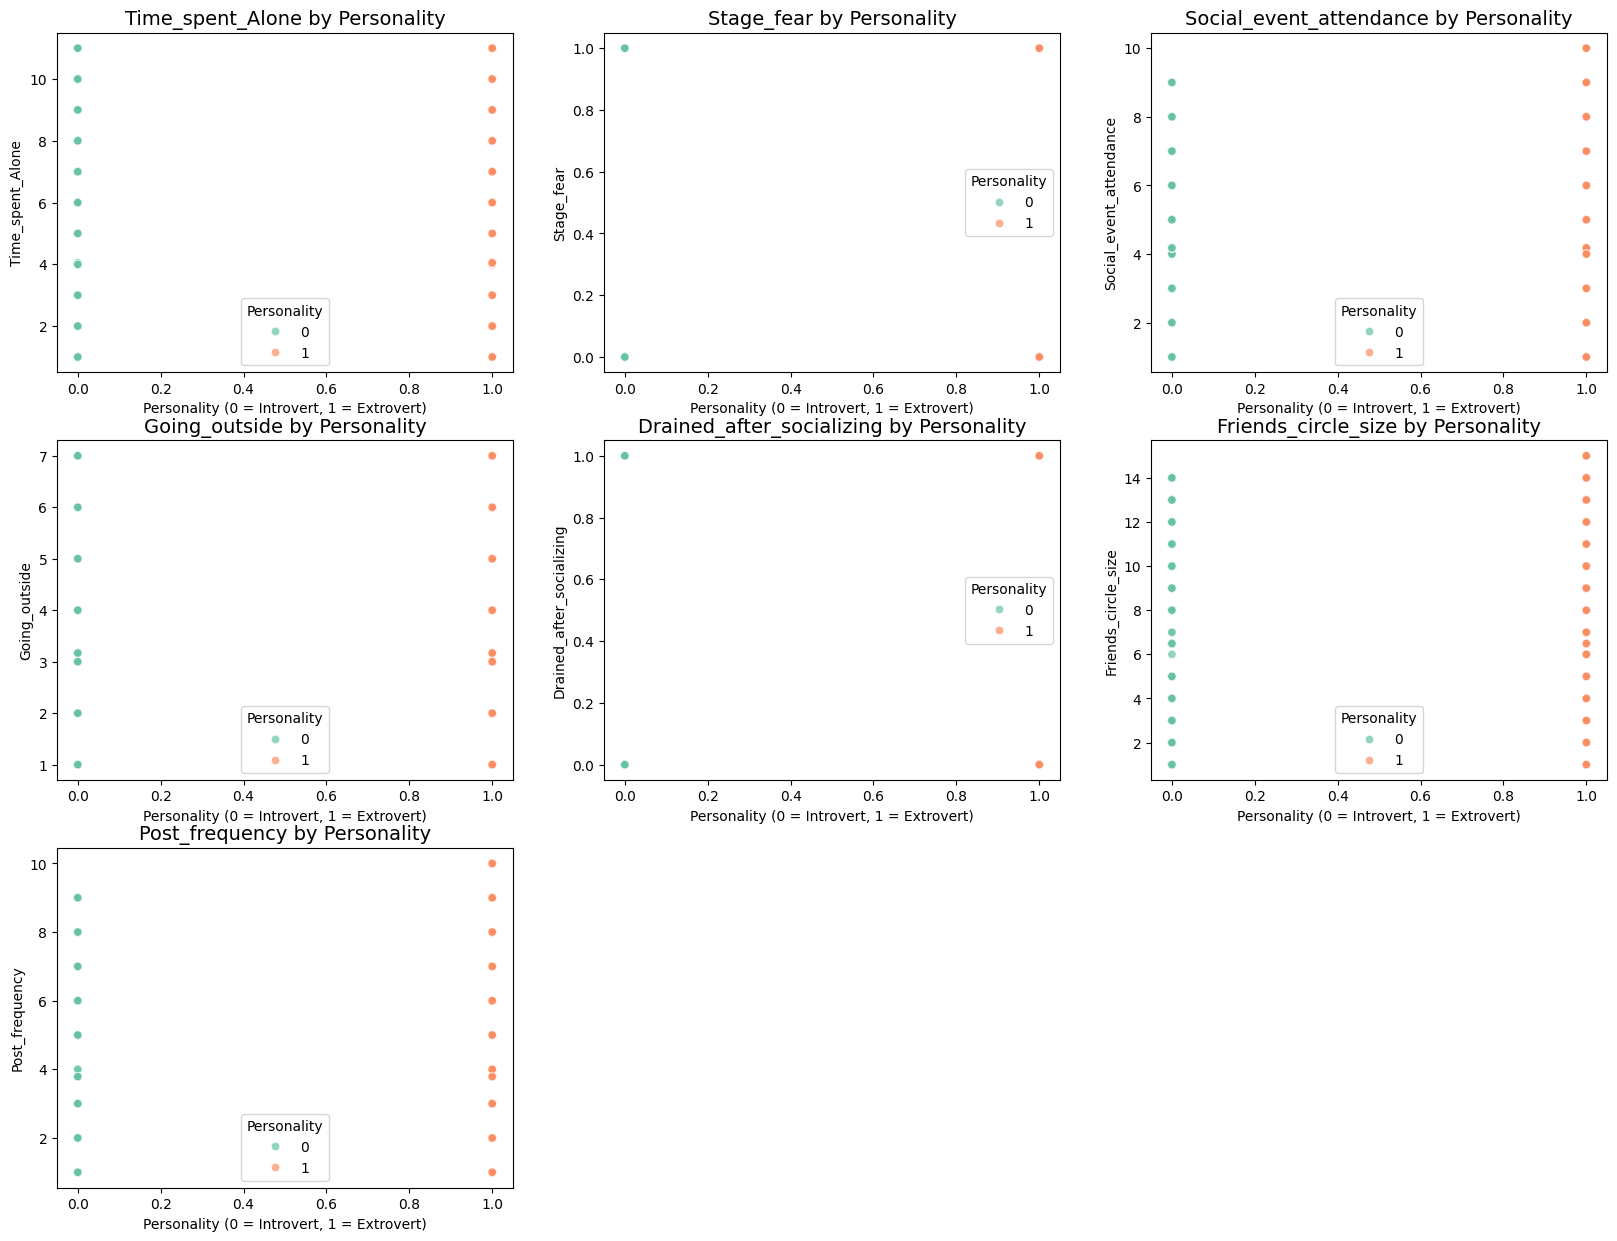

In [58]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.scatterplot(
            x='Personality', 
            y=column, 
            data=data, 
            hue='Personality', 
            palette='Set2',
            alpha=0.7
        )
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()


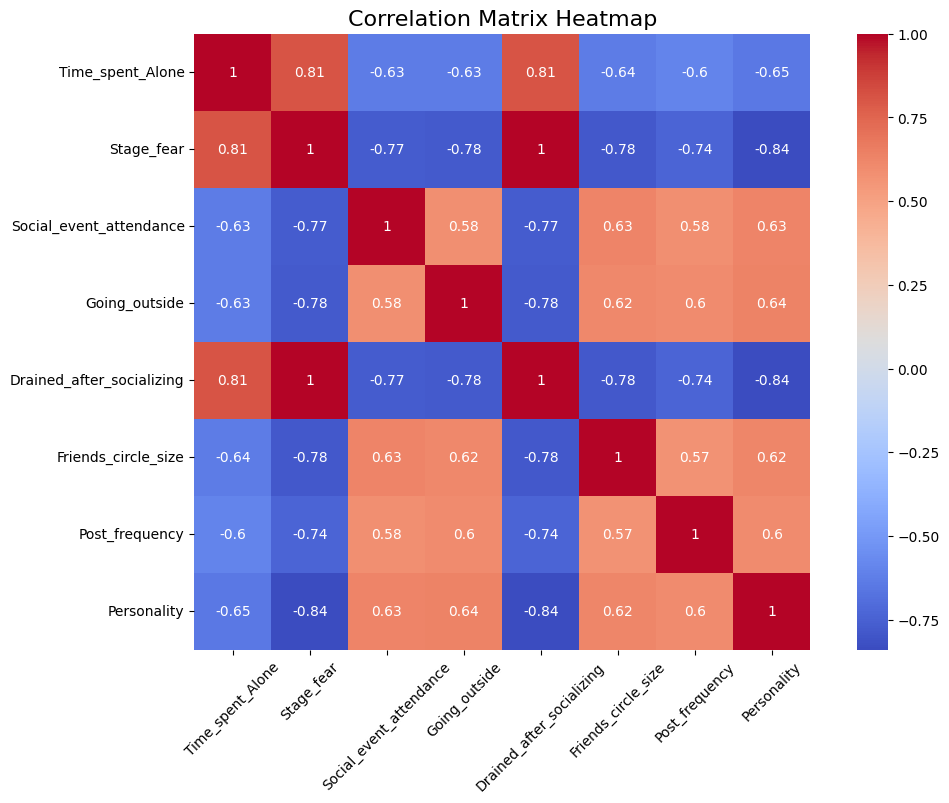

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, 
            annot=True,         # show correlation coefficients
            cmap='coolwarm',    # color map
            square=True)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


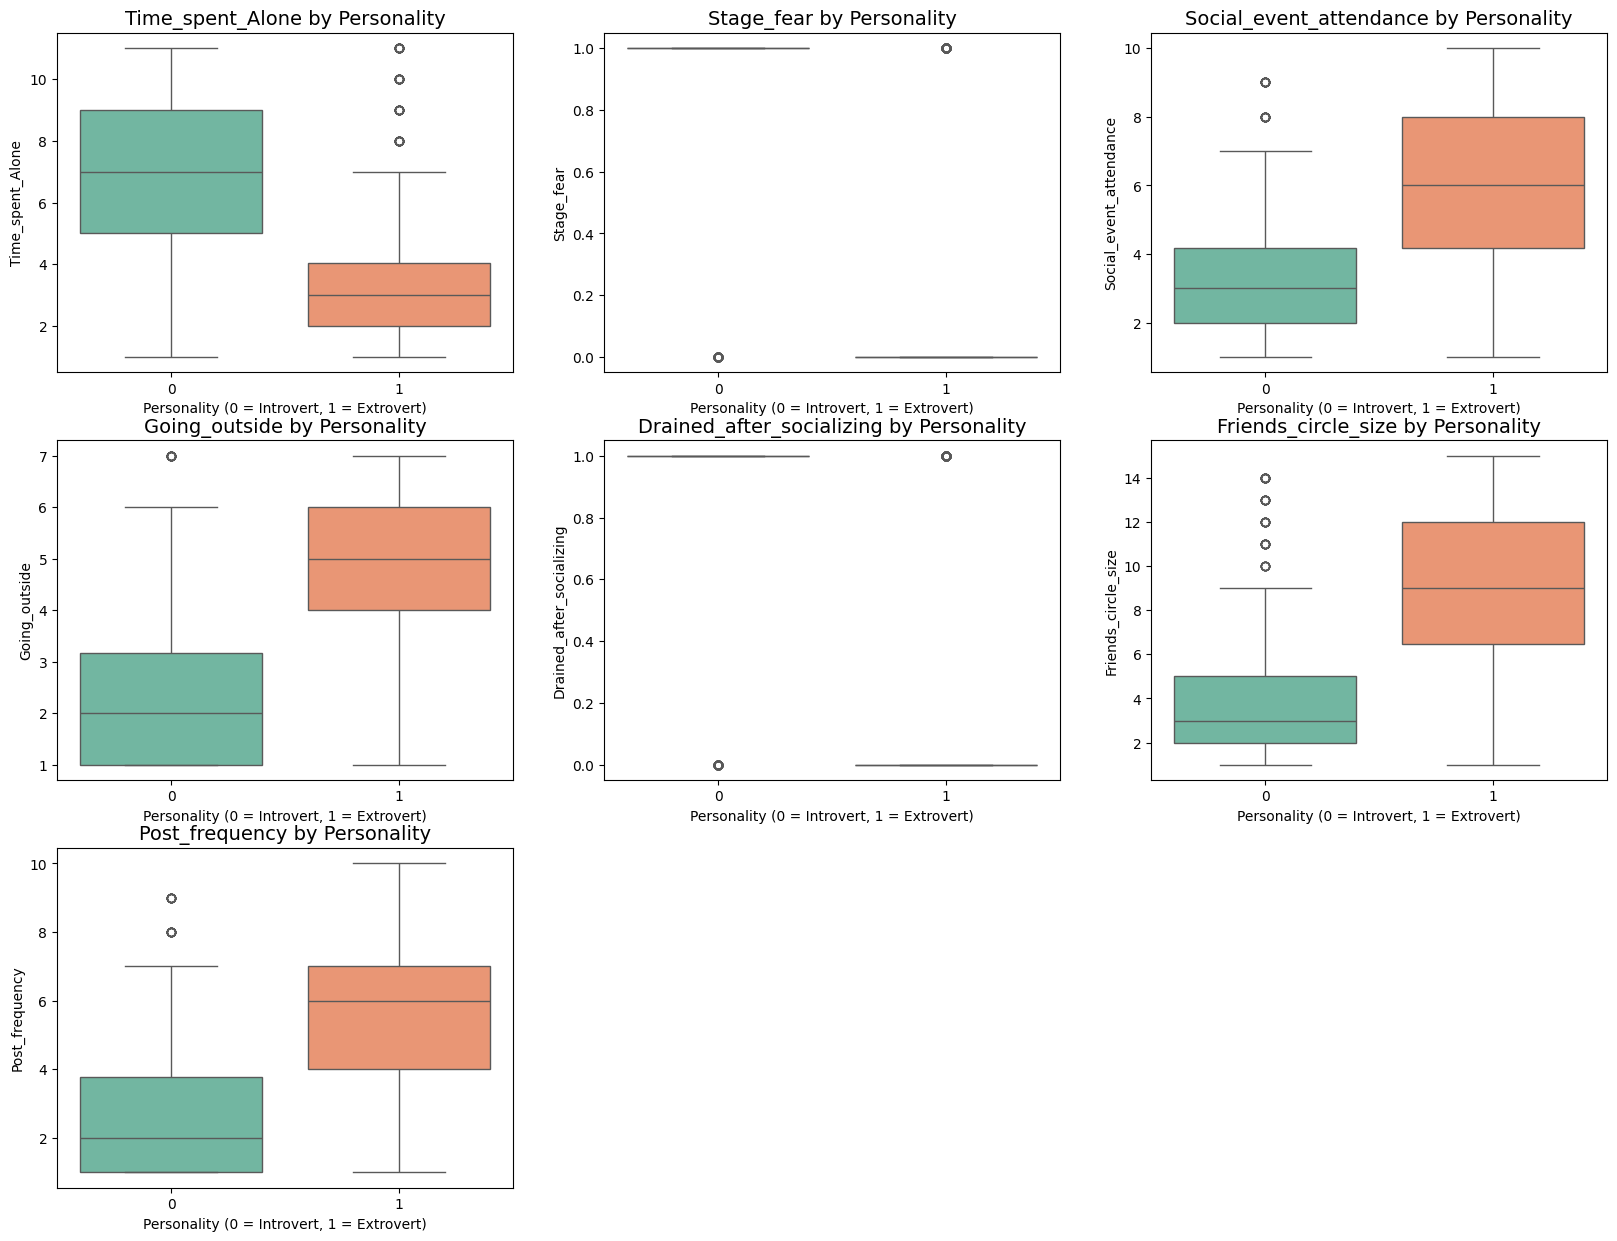

In [61]:

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data.drop('Personality', axis=1).columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(x='Personality', y=column, data=data, palette='Set2')
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()


In [66]:
x=data.drop(columns=['Personality'])

y=data.Personality

In [62]:
from sklearn.preprocessing import StandardScaler

# Drop the target column (Personality) for scaling
X = data.drop('Personality', axis=1)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Show VIF values
print(vif_data)


                     Feature       VIF
0           Time_spent_Alone  2.943625
1                 Stage_fear       inf
2    Social_event_attendance  2.493857
3              Going_outside  2.564416
4  Drained_after_socializing       inf
5        Friends_circle_size  2.606507
6             Post_frequency  2.194294


In [67]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=355)